In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump,load 

In [2]:
df = pd.read_csv('house_price_prediction.csv')
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
#checking for any null values 
df.isna().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [4]:
#checking for any duplicates 
df.duplicated().sum()

np.int64(0)

In [5]:
# checking the total number of columns and rows 
df.shape

(2000, 10)

In [6]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


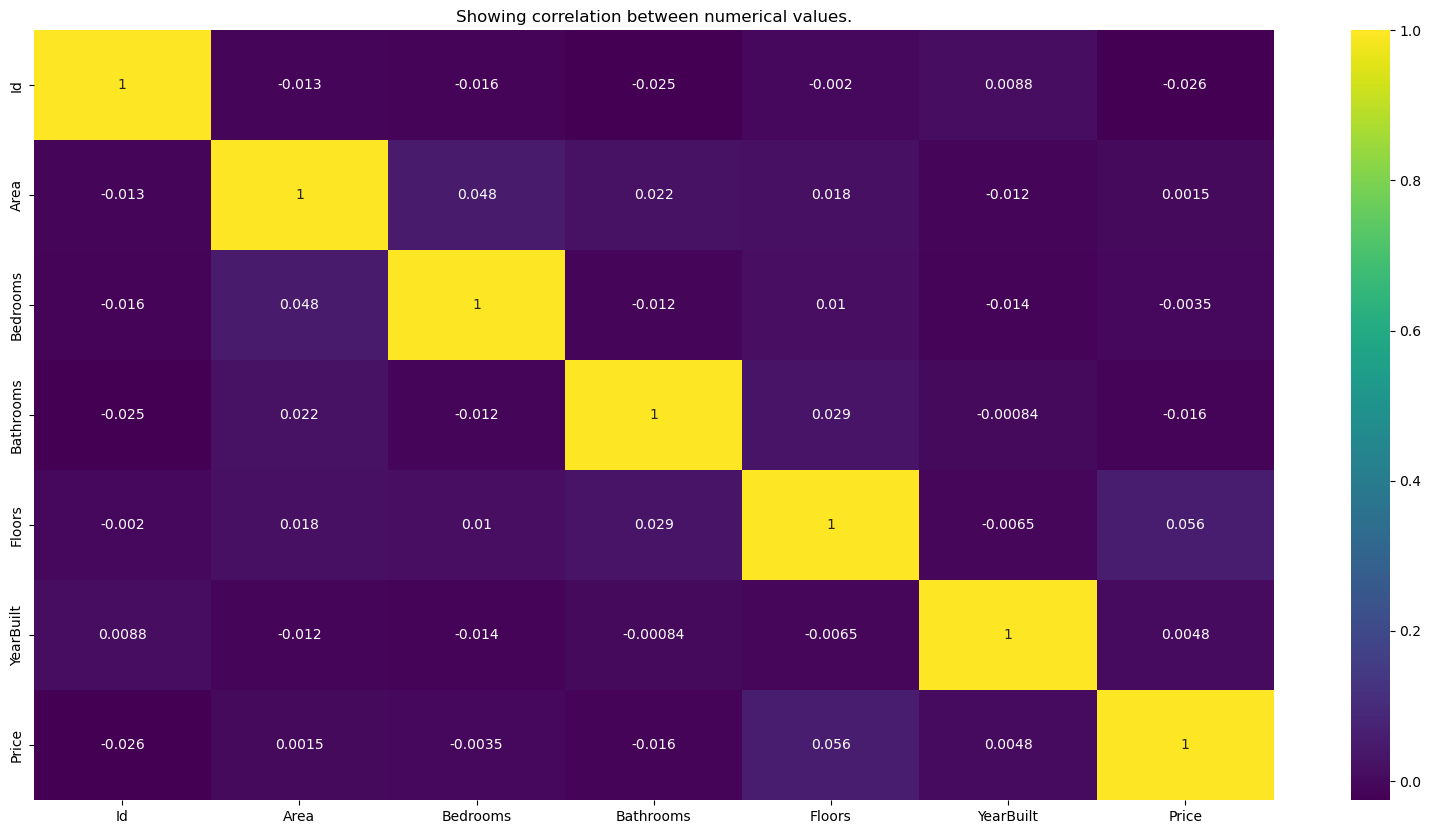

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes('int').corr(),annot=True,fmt='.2g',cmap='viridis')
plt.title("Showing correlation between numerical values.")
plt.show()

In [9]:
#dropping column  id  
df.drop(columns=['Id'],inplace=True)

In [10]:
df.shape

(2000, 9)

In [11]:
df.describe(include='all')

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,Downtown,Fair,No,NaN
freq,NaN,NaN,NaN,NaN,NaN,558,521,1038,NaN
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,NaN,NaN,NaN,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,NaN,NaN,NaN,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,NaN,NaN,NaN,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,NaN,NaN,NaN,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,NaN,NaN,NaN,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,NaN,NaN,NaN,780086.000000


In [12]:
# value counts of categorical columns 
df["Location"].value_counts(),df["Condition"].value_counts(),df["Garage"].value_counts()

(Location
 Downtown    558
 Urban       485
 Suburban    483
 Rural       474
 Name: count, dtype: int64,
 Condition
 Fair         521
 Excellent    511
 Poor         507
 Good         461
 Name: count, dtype: int64,
 Garage
 No     1038
 Yes     962
 Name: count, dtype: int64)

In [31]:
#splitting the columns into x and y 
X = df.drop(columns=["Price"],axis=1)
y = df['Price']

In [32]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [33]:
num_cols = X.select_dtypes("int").columns

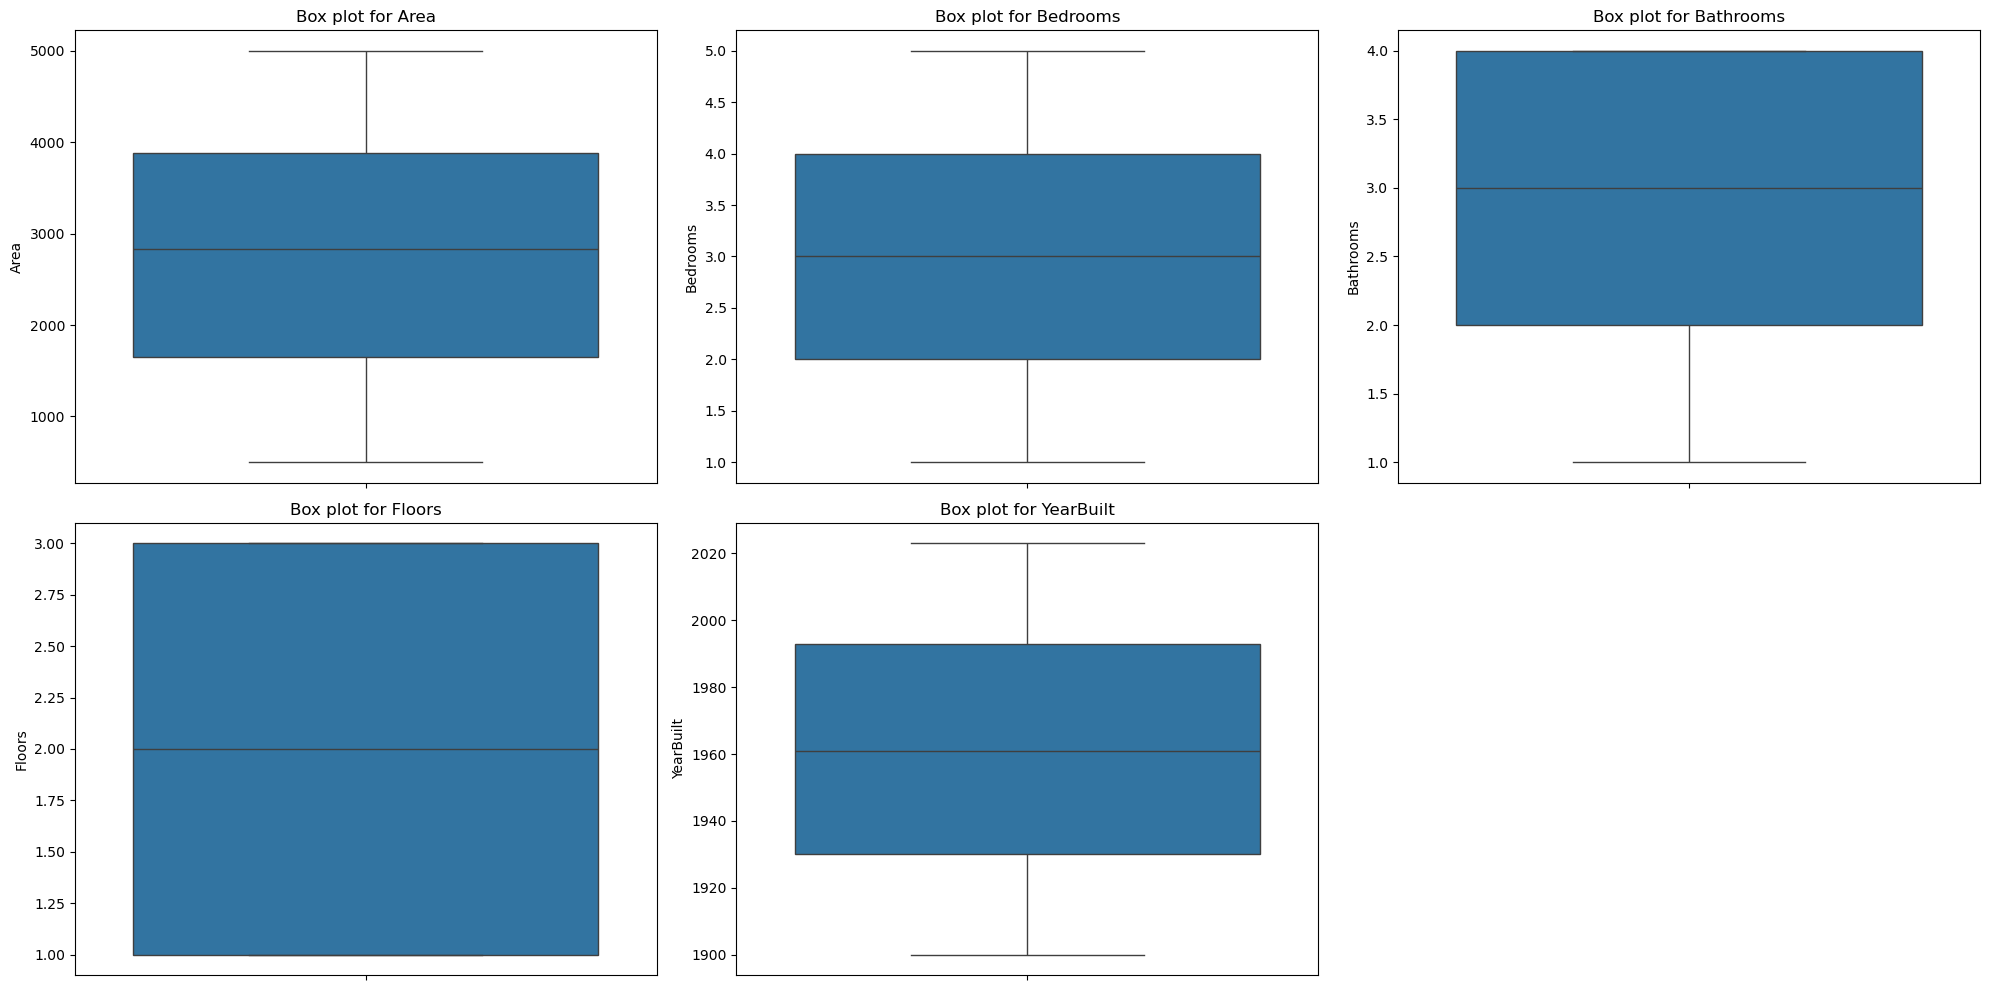

In [38]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(X[col])
    plt.title(f"Box plot for {col}")
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

nuym of cols  6
2
3
Area: Skewness = -0.0386
Bedrooms: Skewness = -0.0218
Bathrooms: Skewness = -0.0665
Floors: Skewness = 0.0118
YearBuilt: Skewness = -0.0016
Price: Skewness = -0.0644


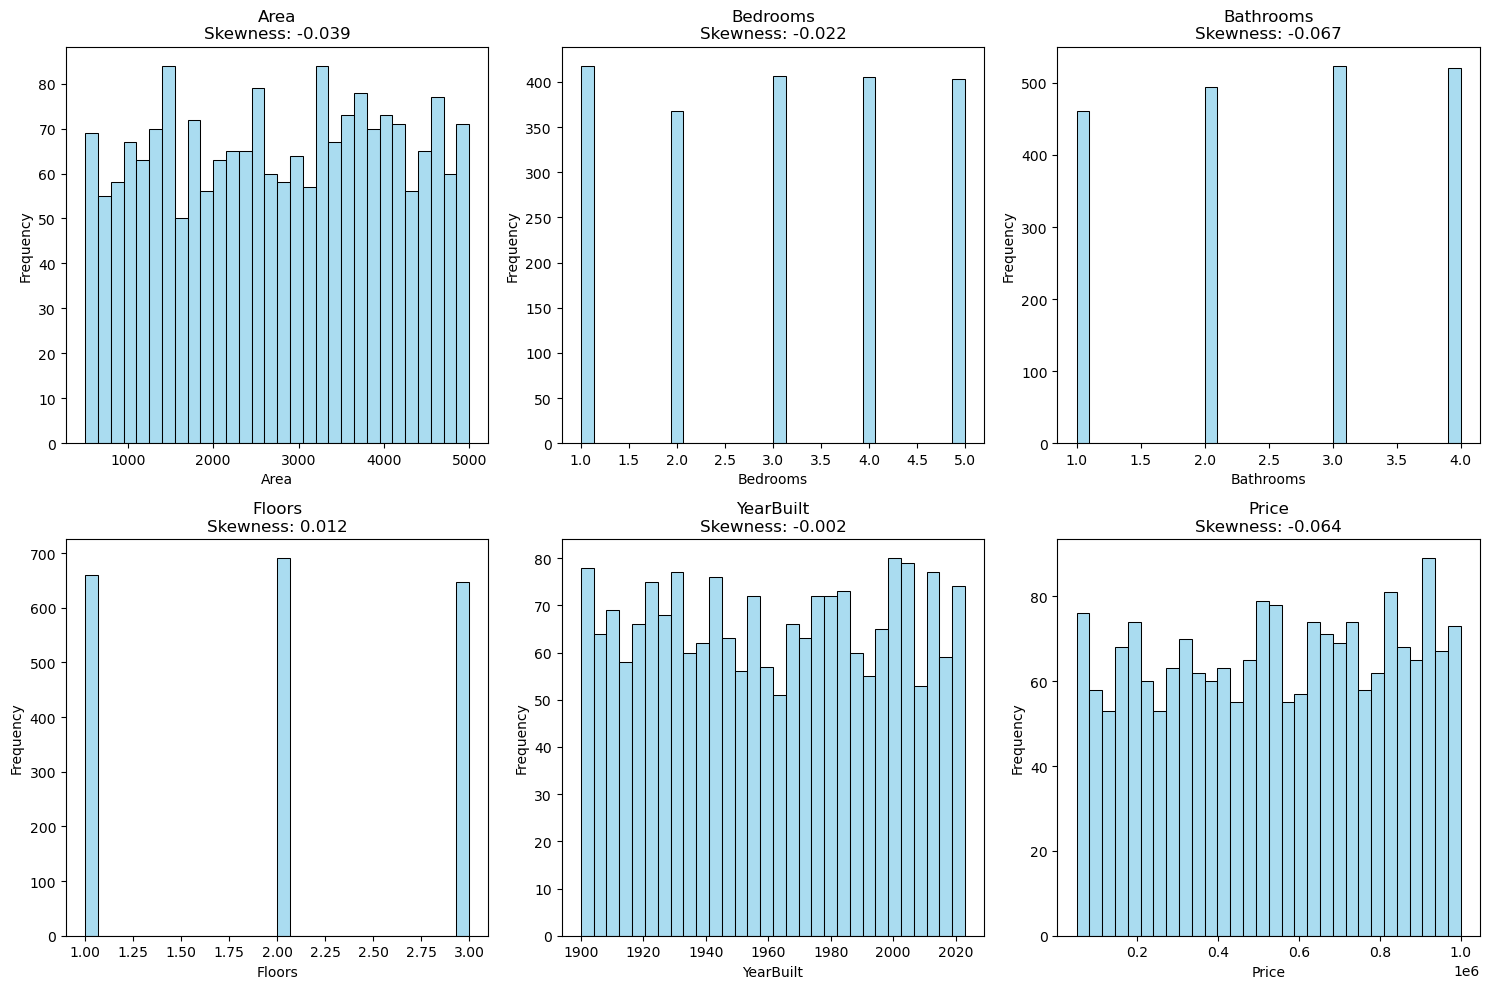

In [56]:
cols = df.select_dtypes("int").columns
n_cols = len(cols)
print("nuym of cols ",n_cols)

# Calculate grid size
n_rows = (n_cols + 2) // 3  # 3 columns per row
print(n_rows)
n_plot_cols = min(n_cols, 3)
print(n_plot_cols)

fig, axes = plt.subplots(n_rows, n_plot_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]  # Handle single subplot

for i, col in enumerate(cols):
    skew_val = df[col].skew()
    print(f"{col}: Skewness = {skew_val:.4f}")
    
    sns.histplot(df[col], bins=30, color='skyblue', edgecolor='black', 
                 alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{col}\nSkewness: {skew_val:.3f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Area:
  Q1: 1653.00
  Q3: 3887.50
  IQR: 2234.50
  Lower Bound: -1698.75
  Upper Bound: 7239.25
  Outliers detected: 0

Bedrooms:
  Q1: 2.00
  Q3: 4.00
  IQR: 2.00
  Lower Bound: -1.00
  Upper Bound: 7.00
  Outliers detected: 0

Bathrooms:
  Q1: 2.00
  Q3: 4.00
  IQR: 2.00
  Lower Bound: -1.00
  Upper Bound: 7.00
  Outliers detected: 0

Floors:
  Q1: 1.00
  Q3: 3.00
  IQR: 2.00
  Lower Bound: -2.00
  Upper Bound: 6.00
  Outliers detected: 0

YearBuilt:
  Q1: 1930.00
  Q3: 1993.00
  IQR: 63.00
  Lower Bound: 1835.50
  Upper Bound: 2087.50
  Outliers detected: 0

Price:
  Q1: 300098.00
  Q3: 780086.00
  IQR: 479988.00
  Lower Bound: -419884.00
  Upper Bound: 1500068.00
  Outliers detected: 0


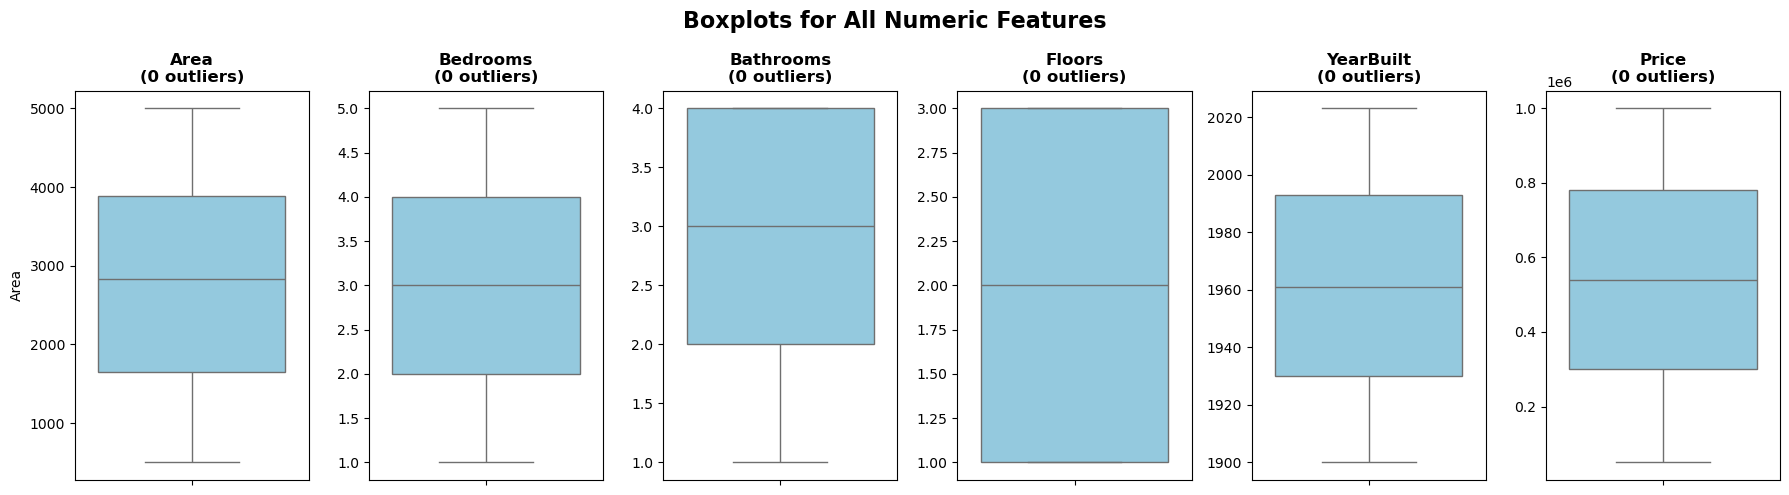


2. Horizontal Boxplots for Better Readability
----------------------------------------------------------------------


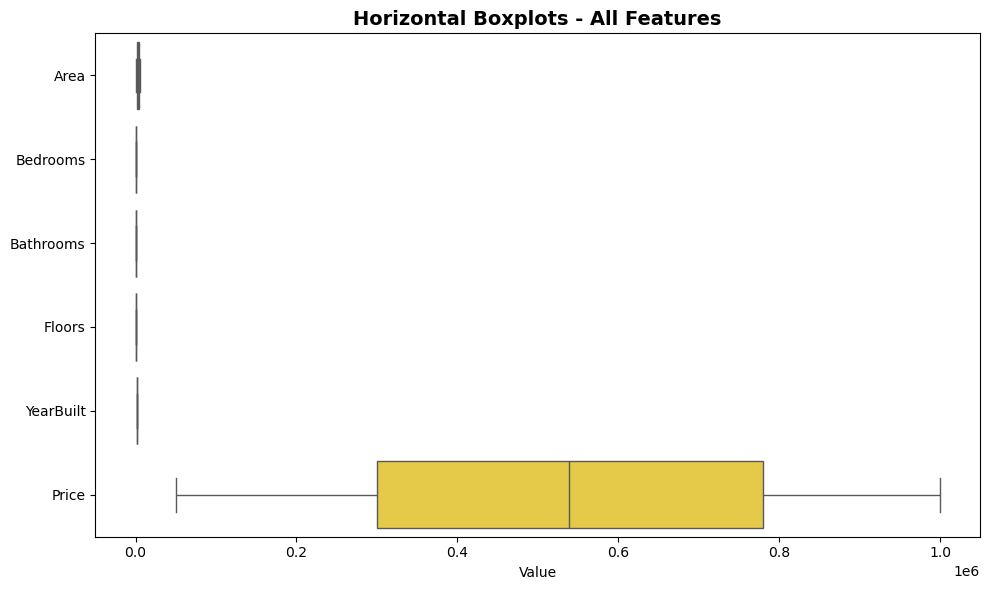


3. Boxplot with Strip Plot - See All Data Points
----------------------------------------------------------------------


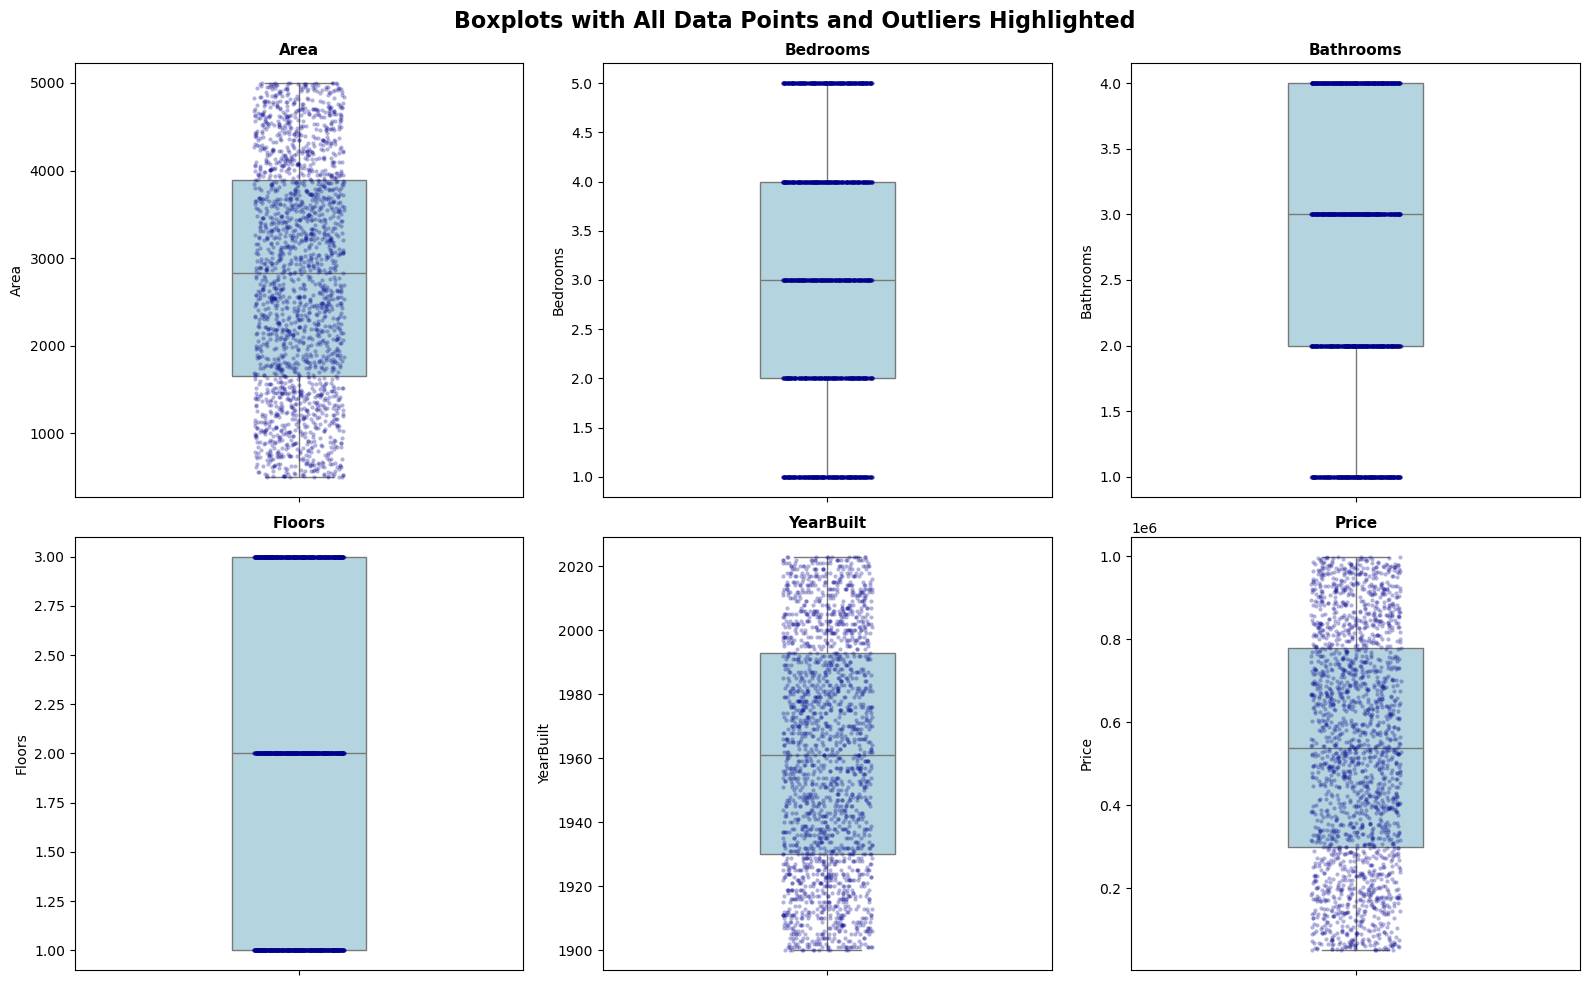


4. Grouped Boxplots - Compare Across Categories
----------------------------------------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_4712\125072127.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bedrooms', y='Price', ax=axes[0], palette='Set3')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4712\125072127.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bedrooms', y='Area', ax=axes[1], palette='Set2')


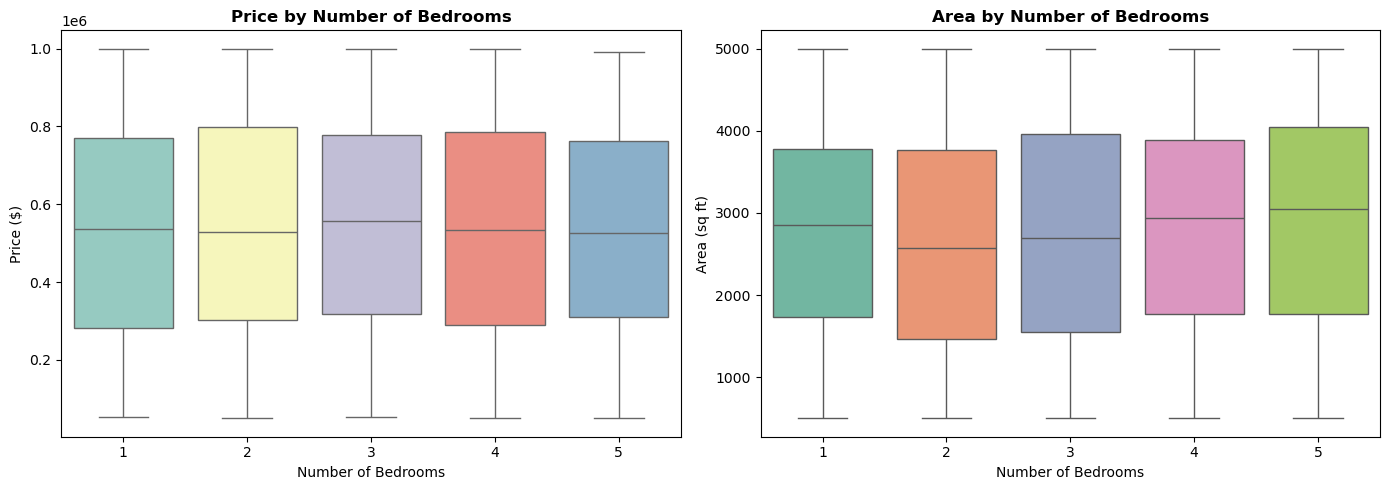


5. Detailed Boxplot with Statistical Annotations
----------------------------------------------------------------------


C:\Users\DELL\AppData\Local\Temp\ipykernel_4712\125072127.py:125: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(df['Price'], labels=['Price'], patch_artist=True,


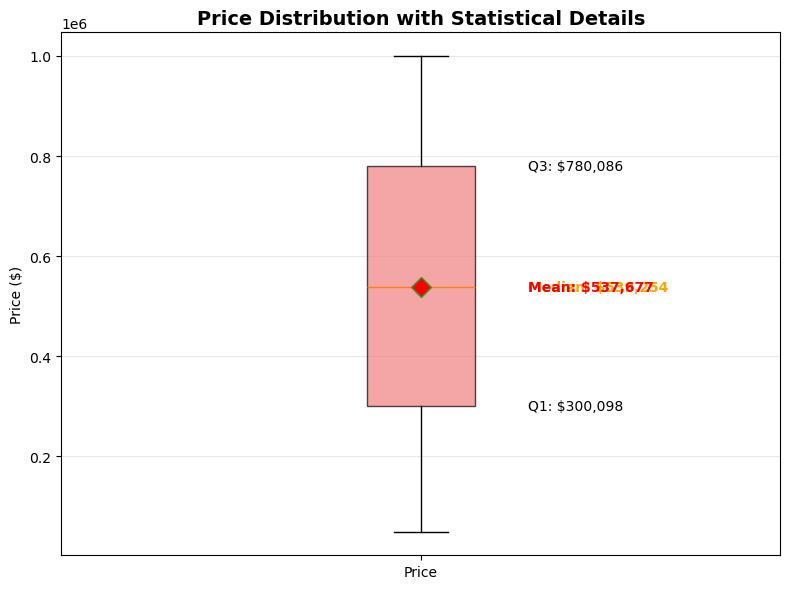


6. EXTRACTING OUTLIERS FROM DATA
----------------------------------------------------------------------

SUMMARY - WHAT TO DO NEXT

After identifying outliers with boxplots:

1. INVESTIGATE: Don't automatically remove outliers!
   - Are they data entry errors?
   - Are they genuine extreme values?
   - Do they represent important cases?

2. DECIDE ON ACTION:
   - Keep them (if legitimate)
   - Remove them (if errors)
   - Transform data (log, sqrt)
   - Use robust methods (median instead of mean)
   - Cap/winsorize (replace with threshold values)

3. DOCUMENT YOUR DECISION:
   - Always note why you removed/kept outliers
   - Track how many were affected

CODE TO REMOVE OUTLIERS (use carefully!):
# Remove outliers for a specific column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | 
                (df['Price'] > (Q3 + 1.5 * IQR)))]



In [ ]:
########## THIS IS GENERATED BY CLAUDE AND CAN BE USED IN FUTURE TO LEARN #


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = len(numeric_cols)

# Create subplots
fig, axes = plt.subplots(1, n_cols, figsize=(18, 5))
fig.suptitle('Boxplots for All Numeric Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_cols):
    # Calculate outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Create boxplot
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}\n({len(outliers)} outliers)', fontweight='bold')
    axes[i].set_ylabel(col if i == 0 else '')
    
    # Print statistics
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier values: {sorted(outliers.values)[:5]}...")  # Show first 5

plt.tight_layout()
plt.show()

# ============ EXAMPLE 2: Horizontal Boxplots (Better for Many Categories) ============
print("\n" + "="*70)
print("2. Horizontal Boxplots for Better Readability")
print("-" * 70)

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2', ax=ax)
ax.set_title('Horizontal Boxplots - All Features', fontsize=14, fontweight='bold')
ax.set_xlabel('Value')
plt.tight_layout()
plt.show()

# ============ EXAMPLE 3: Boxplot with Individual Points (Outliers Highlighted) ============
print("\n" + "="*70)
print("3. Boxplot with Strip Plot - See All Data Points")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue', width=0.3)
    
    # Add strip plot to show all points
    sns.stripplot(y=df[col], ax=axes[i], color='darkblue', 
                  alpha=0.3, size=3, jitter=True)
    
    # Highlight outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outlier_data) > 0:
        axes[i].scatter([0]*len(outlier_data), outlier_data, 
                       color='red', s=100, zorder=3, 
                       marker='o', edgecolors='darkred', linewidths=2,
                       label='Outliers')
    
    axes[i].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[i].set_ylabel(col)
    if len(outlier_data) > 0:
        axes[i].legend()

# Hide the last subplot if odd number of columns
if n_cols < 6:
    axes[5].set_visible(False)

fig.suptitle('Boxplots with All Data Points and Outliers Highlighted', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============ EXAMPLE 4: Grouped Boxplots (Category-wise) ============
print("\n" + "="*70)
print("4. Grouped Boxplots - Compare Across Categories")
print("-" * 70)

# Create boxplots grouped by Bedrooms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price by Bedrooms
sns.boxplot(data=df, x='Bedrooms', y='Price', ax=axes[0], palette='Set3')
axes[0].set_title('Price by Number of Bedrooms', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Price ($)')

# Area by Bedrooms
sns.boxplot(data=df, x='Bedrooms', y='Area', ax=axes[1], palette='Set2')
axes[1].set_title('Area by Number of Bedrooms', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Area (sq ft)')

plt.tight_layout()
plt.show()

# ============ EXAMPLE 5: Customized Boxplot with Statistics ============
print("\n" + "="*70)
print("5. Detailed Boxplot with Statistical Annotations")
print("-" * 70)

fig, ax = plt.subplots(figsize=(8, 6))

# Create boxplot for Price
bp = ax.boxplot(df['Price'], labels=['Price'], patch_artist=True,
                showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', 
                                               markersize=10, label='Mean'))

# Customize colors
bp['boxes'][0].set_facecolor('lightcoral')
bp['boxes'][0].set_alpha(0.7)

# Add statistics as text
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.50)  # Median
Q3 = df['Price'].quantile(0.75)
mean = df['Price'].mean()
IQR = Q3 - Q1

# Annotate statistics on the plot
ax.text(1.15, Q1, f'Q1: ${Q1:,.0f}', fontsize=10, va='center')
ax.text(1.15, Q2, f'Median: ${Q2:,.0f}', fontsize=10, va='center', 
        fontweight='bold', color='orange')
ax.text(1.15, Q3, f'Q3: ${Q3:,.0f}', fontsize=10, va='center')
ax.text(1.15, mean, f'Mean: ${mean:,.0f}', fontsize=10, va='center', 
        color='red', fontweight='bold')

ax.set_title('Price Distribution with Statistical Details', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============ EXAMPLE 6: Identify and Extract Outliers ============
print("\n" + "="*70)
print("6. EXTRACTING OUTLIERS FROM DATA")
print("-" * 70)

def get_outliers(data, column):
    """Function to detect and return outliers"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check each column
for col in numeric_cols:
    outliers_df, lower, upper = get_outliers(df, col)
    
    if len(outliers_df) > 0:
        print(f"\n{col}:")
        print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
        print(f"  Number of outliers: {len(outliers_df)}")
        print(f"  Percentage: {len(outliers_df)/len(df)*100:.2f}%")
        print(f"  Outlier indices: {outliers_df.index.tolist()[:10]}")  # First 10

# ============ SUMMARY ============
print("\n" + "="*70)
print("SUMMARY - WHAT TO DO NEXT")
print("="*70)
print("""
After identifying outliers with boxplots:

1. INVESTIGATE: Don't automatically remove outliers!
   - Are they data entry errors?
   - Are they genuine extreme values?
   - Do they represent important cases?

2. DECIDE ON ACTION:
   - Keep them (if legitimate)
   - Remove them (if errors)
   - Transform data (log, sqrt)
   - Use robust methods (median instead of mean)
   - Cap/winsorize (replace with threshold values)

3. DOCUMENT YOUR DECISION:
   - Always note why you removed/kept outliers
   - Track how many were affected

CODE TO REMOVE OUTLIERS (use carefully!):
# Remove outliers for a specific column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | 
                (df['Price'] > (Q3 + 1.5 * IQR)))]
""")
print("="*70)